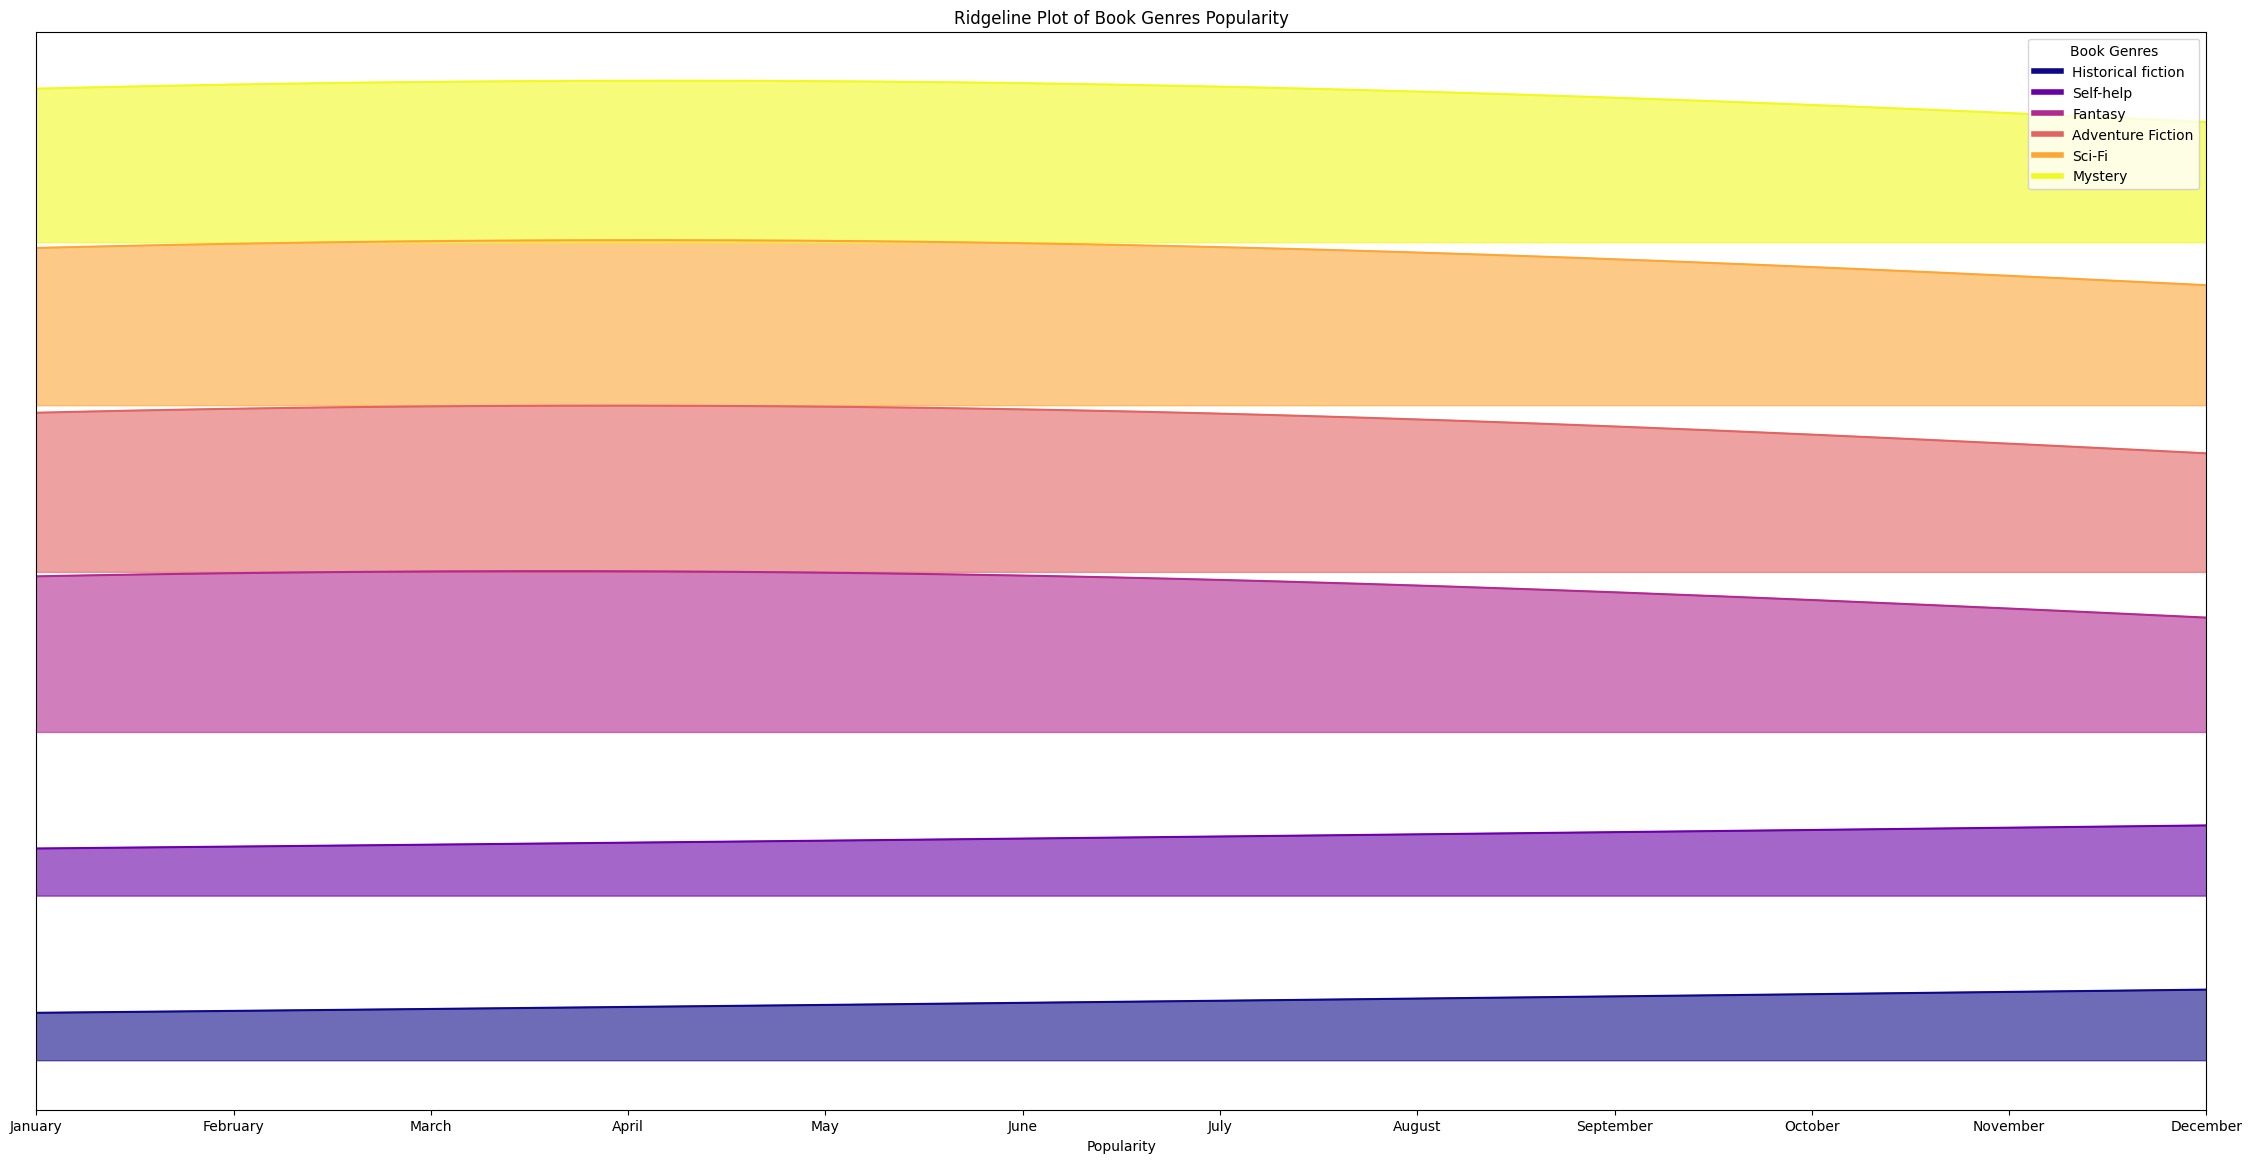

In [13]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

 #The popularity is inversely related to the number in this dictionary
new_popularity_scale_factors = {
    'Historical fiction': 8,  
    'Self-help': 8,
    'Fantasy': 2,
    'Adventure Fiction': 2,
    'Sci-Fi': 2,
    'Mystery': 2 
}

# Generate the data for plotting
genre_data = {}
for genre, scale in new_popularity_scale_factors.items():
    # Create random data with a normal distribution and scale to magnify the difference
    data = np.random.normal(loc=new_popularity_scale_factors[genre], scale=5, size=1000) * scale
    genre_data[genre] = data

# Sort genres by their popularity
sorted_genres = sorted(new_popularity_scale_factors, key=new_popularity_scale_factors.get, reverse=True)
# Create a color map
colors = plt.cm.plasma(np.linspace(0, 1, len(sorted_genres)))

# And now create the figure
fig, ax = plt.subplots(figsize=(28, 14))

# Base value for y-axis placement of the plots
base_y = 2
y_step = 6  # The separation between the plots

# Plot each genre
for i, genre in enumerate(sorted_genres):
    data = genre_data[genre]
    # Align the bin edges of the KDEs to make sure they align correctly
    x_d = np.linspace(min(data), max(data), 1000)
    # Calculate the KDE using a Gaussian kernel
    kde = stats.norm.pdf(x_d, loc=np.mean(data), scale=np.std(data))
    
    # Scale the density by the factor to make the peaks more pronounced
    kde *= new_popularity_scale_factors[genre]
    
    # Offset KDE for the ridgeline effect
    kde += base_y
    
    # Fill under the KDE curve
    ax.fill_between(x_d, base_y, kde, alpha=0.6,color=colors[i])
    
    # Plot the KDE line
    ax.plot(x_d, kde, color=colors[i])
    
    # Increment the base by the maximum of the current KDE to place the next one
    base_y += max(kde) - min(kde)

# Set axis labels and title
ax.set_title('Ridgeline Plot of Book Genres Popularity')
ax.set_xlabel('Popularity')
# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], color=colors[i], lw=4, label=sorted_genres[i]) for i in range(len(sorted_genres))]

# Add a legend to the plot
ax.legend(handles=legend_handles, title='Book Genres', loc='upper right')


# Remove y-axis labels and ticks
ax.set_yticks([])

# Define the x-axis to cover the range of months (as in the uploaded image)
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))  # 1-12 for months
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(month_order)

# Show the plot
plt.show()



